In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [1]:
dataset=pd.read_csv('Mall_Customers.csv')
df=dataset.copy()
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
pd.pivot_table(df,index=["Gender"],values=["Spending Score (1-100)"])

,Spending Score (1-100)
Gender,
Female,51.526786
Male,48.511364


## Observation : Gender Dependency : Females spend slightly more than males.

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


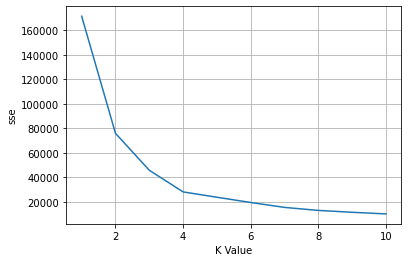

In [8]:
X1=df.loc[:,['Age','Spending Score (1-100)']].values

sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X1)
    sse.append(kmeans.inertia_)  #inertia is used to find sum of square root error
    
plt.figure()
plt.grid()
plt.plot(range(1,11),sse)
plt.xlabel("K Value")
plt.ylabel("sse")
plt.show()

In [9]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 1 2 0 1 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2
 0 2 0 3 0 3 1 2 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 0 1 0 3 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 3 0
 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [10]:
print(kmeans.cluster_centers_)   #give centroids

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


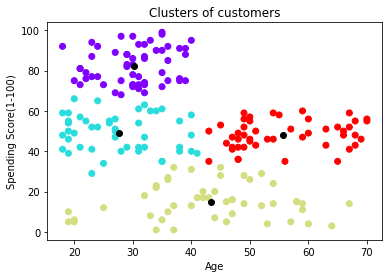

In [11]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

## Observation : Age Dependency : From the scatterplot it shows that younger people tend to spend more.

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


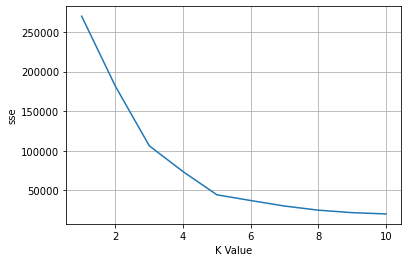

In [12]:
X2=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X2)
    sse.append(kmeans.inertia_)  #inertia is used to find sse
    
plt.figure()
plt.grid()
plt.plot(range(1,11),sse)
plt.xlabel("K Value")
plt.ylabel("sse")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [14]:
print(kmeans.cluster_centers_)   #give centroids

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


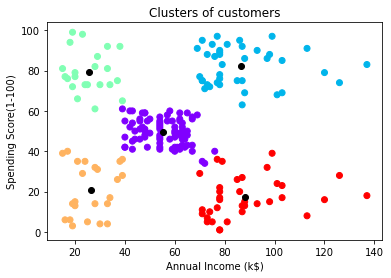

In [15]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

## Observation : Annual Income Dependency

In "red" colored cluster, we can see people have low annual income and low spending scores.
The shops/mall will be least interested in people belonging to this cluster.

In "blue" colored cluster, we see that people have average income and an average spending score.
These people again will not be the prime targets of the shops or mall, but again they will be considered .

In "yellow" colored cluster, we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money.

In "purple" colored cluster, we can see that people have low income but higher spending scores.
The shops/malls might not target these people that effectively but still will not lose them.

In "green" colored cluster, we see that people have high income and high spending scores.
This is the ideal case for the mall or shops as these people are the prime sources of profit

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


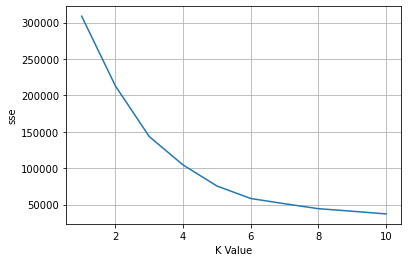

In [16]:
X3=df.iloc[:,1:]

sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X3)
    sse.append(kmeans.inertia_)  #inertia is used to find sse
    
plt.figure()
plt.grid()
plt.plot(range(1,11),sse)
plt.xlabel("K Value")
plt.ylabel("sse")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
print(label)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [18]:
print(kmeans.cluster_centers_)   #give centroids

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]]


In [19]:
clusters=kmeans.fit_predict(X3)
df['label']=clusters

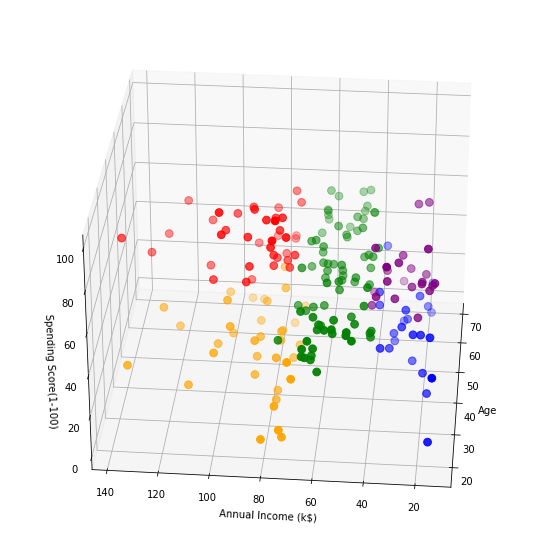

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label==0],c='blue',s=60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label==1],c='red',s=60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label==2],c='green',s=60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label==3],c='orange',s=60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label==4],c='purple',s=60)
ax.view_init(30,185)


plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score(1-100)')
plt.show()